<a href="https://colab.research.google.com/github/anmolmunnolli/Anmol_moviesdb/blob/main/asgard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import zipfile

# zip_file_path = "/content/drive/MyDrive/products.csv.zip"
# extract_folder_path = "/content/"

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_folder_path)


In [16]:
import pandas as pd
import zipfile

zipped_file_path = "/content/drive/MyDrive/products.csv.zip"

cols = ['product_title','product_category','product_images','product_url','meta_data_1','meta_data_2',\
        'meta_data_3','spider_name']

filtered_spider_names = ['asos', 'adidas', 'nike','sportsdirect','argos','decathlon','shein','onitsukatiger',\
                       'marksandspencer', 'ao', 'johnlewis','currys','reebok','levis','sephora','next',\
                       'amazon', 'depop']

with zipfile.ZipFile(zipped_file_path, 'r') as zip_ref:
    files_in_zip = zip_ref.namelist()
    if 'products.csv' in files_in_zip:
        with zip_ref.open('products.csv') as file:
            df = pd.read_csv(file, usecols = cols)
        filtered_df = df[df['spider_name'].isin(filtered_spider_names)]
        print(filtered_df.head(10))

<ipython-input-16-3f1bab408430>:17: DtypeWarning: Columns (1,112,113,114,16741,16742) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, usecols = cols)


                                           product_title  \
13651         Dynamic Pro Women's Hooded Training Jacket   
13652  Refurbished Pre-Shaped Cool Weather Arm Warmer...   
13653        GPS ONmove 220 Watch Connected - Black Blue   
13654  MI SMART BAND 4 FITNESS TRACKER & HEART RATE M...   
13655               Self-Adhesive Fabric Repair Tape Kit   
13656   Ledlenser MH7 Rechargable LED Outdoor Head Torch   
13657  Splash About Toddler Jammers, Crocodile Swamp,...   
13658                       WATER POLO BALL WP900 SIZE 5   
13659          M3 Junior Bow Package, Right Handed, Camo   
13660                  Shimano Tiagra FC-4700 Chainrings   

                                             product_url  \
13651  https://www.decathlon.co.uk/p/mp/craghoppers/d...   
13652  https://www.decathlon.co.uk/p/mp/van-rysel/ref...   
13653  https://www.decathlon.co.uk/p/gps-onmove-220-w...   
13654  https://www.decathlon.co.uk/p/mi-smart-band-4-...   
13655  https://www.decathlon.co.uk/p/se

In [19]:
unique_spiders = filtered_df['spider_name'].unique()
print(unique_spiders)

['decathlon' 'marksandspencer' 'amazon' 'currys' 'shein' 'sephora'
 'reebok' 'sportsdirect' 'onitsukatiger' 'depop' 'argos' 'adidas' 'asos'
 'ao' 'levis' 'nike' 'next']


In [ ]:
df.to_csv('data.csv', index=False)

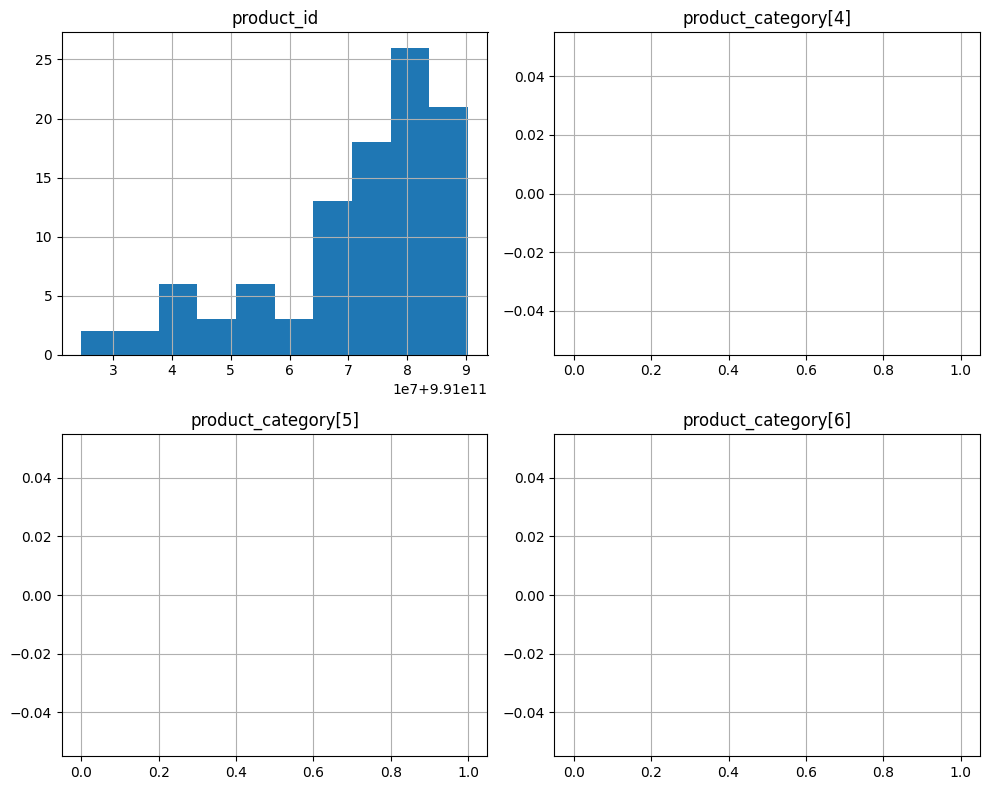

In [ ]:
summary_stats = df.describe()
from matplotlib import pyplot as plt
# Display data types
data_types = df.dtypes

# Visualizations (example: histogram for the first 10 columns)
df.iloc[:, :10].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()